Write a program to implement Principle Component Analysis technique of dimensionality reduction and evaluate the performance with a classifier. Use Breast Cancer Wisconsin (Diagnostic) Dataset


Train: 341 Val: 114 Test: 114
Variance retained: 0.9509104575085419


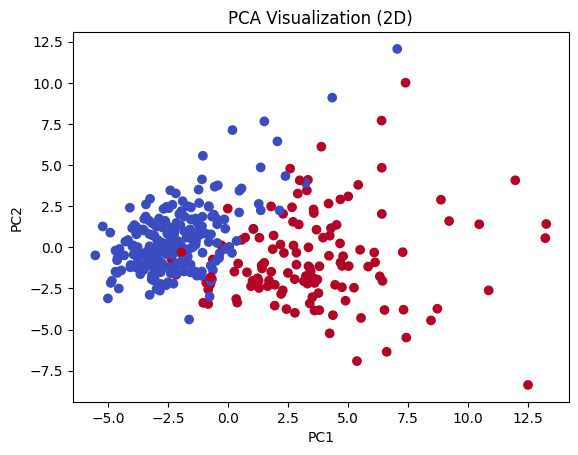


MODEL PERFORMANCE (RANDOM FOREST + PCA):
Accuracy : 0.9298245614035088
Precision: 0.9047619047619048
Recall   : 0.9047619047619048
F1 Score : 0.9047619047619048

Confusion Matrix:
 [[68  4]
 [ 4 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



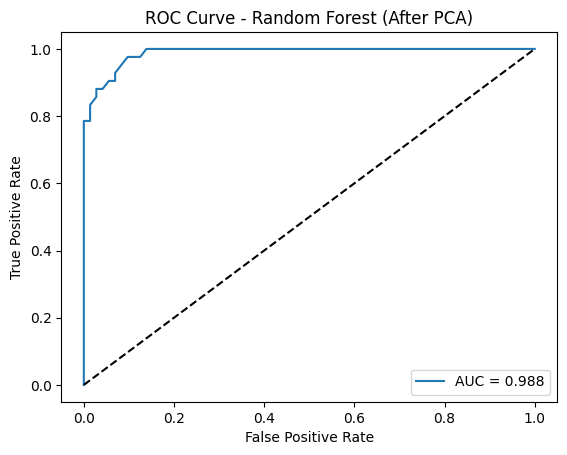

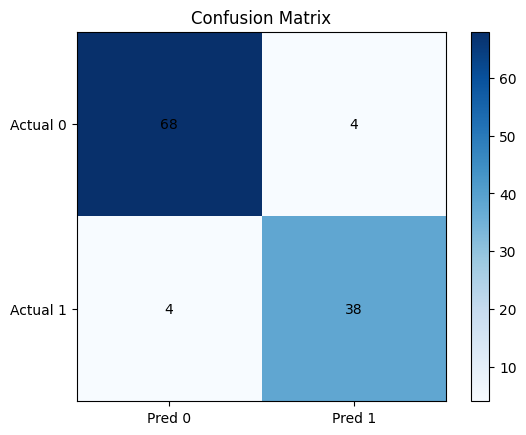

In [2]:
# =======================================
# 1️⃣ IMPORT LIBRARIES
# =======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_curve, auc
)

# =======================================
# 2️⃣ LOAD & CLEAN DATA
# =======================================
df = pd.read_csv(r"D:\B tech\Semester 5\ML\Practicals\dataset\breastcancer.csv")

# Remove unnecessary columns
if "id" in df.columns:
    df = df.drop("id", axis=1)
if "Unnamed: 32" in df.columns:
    df = df.drop("Unnamed: 32", axis=1)

# Encode target (M = 1, B = 0)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Fill missing values
df = df.fillna(df.mean(numeric_only=True))

# Features and target
X = df.drop("diagnosis", axis=1)
Y = df["diagnosis"]

# =======================================
# 3️⃣ TRAIN / VALIDATION / TEST SPLIT
# =======================================
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X, Y, test_size=0.40, random_state=42, stratify=Y
)

X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.50, random_state=42, stratify=Y_temp
)

print("Train:", len(X_train), "Val:", len(X_val), "Test:", len(X_test))

# =======================================
# 4️⃣ SCALING (REQUIRED BEFORE PCA)
# =======================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# =======================================
# 5️⃣ PCA (DIMENSIONALITY REDUCTION)
# Keep top 10 components
# =======================================
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca   = pca.transform(X_val_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Variance retained:", pca.explained_variance_ratio_.sum())

# PCA Visualization (first 2 components)
pca2 = PCA(n_components=2)
components_2D = pca2.fit_transform(X_train_scaled)

plt.scatter(components_2D[:, 0], components_2D[:, 1], c=Y_train, cmap='coolwarm')
plt.title("PCA Visualization (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# =======================================
# 6️⃣ RANDOM FOREST CLASSIFIER
# =======================================
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train_pca, Y_train)

# Predictions
y_pred = model.predict(X_test_pca)
y_prob = model.predict_proba(X_test_pca)[:, 1]

# =======================================
# 7️⃣ EVALUATION METRICS
# =======================================
acc  = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
rec  = recall_score(Y_test, y_pred)
f1   = f1_score(Y_test, y_pred)
cm   = confusion_matrix(Y_test, y_pred)

print("\nMODEL PERFORMANCE (RANDOM FOREST + PCA):")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

# =======================================
# 8️⃣ ROC CURVE
# =======================================
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (After PCA)")
plt.legend()
plt.show()

# =======================================
# 9️⃣ CONFUSION MATRIX HEATMAP
# =======================================
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["Actual 0", "Actual 1"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.show()
